In [2]:
import sys
sys.path.append("..") ## resetting the path to the parent directory

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('../data/coin_metadata.csv')

In [5]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
def year_converter(year_string):
    
    year_string = str(year_string)
    
    split_string = year_string.split(' ')
    
    if len(split_string) > 1:
        if 'AD' in split_string:
            idx = split_string.index('AD')
            year = int(split_string[len(split_string) - 1 - idx])
        elif 'BC' in split_string:
            idx = split_string.index('BC')
            year = int('-' + split_string[len(split_string) - 1 - idx])
    else:
        if year_string == 'nan':
            year = None
        else:
            year = int(year_string)
    return year

In [7]:
# ## From Min
# def fill_year_na(df):
#     avg_year = df.groupby('portrait').agg({'year': 'mean'}).reset_index()
#     na_mask = df['year'].isna()
#     df_masked = df[na_mask]
#     for i in df_masked.index:
#         portrait = df_masked.loc[i, 'portrait']
#         if portrait in avg_year['portrait'].values:
#             avg = avg_year.loc[avg_year['portrait'] == portrait, 'year'].values[0]
#             df_masked.loc[i, 'year'] = avg
#         else:
#             df_masked.loc[i, 'year'] = avg_year['year'].mean()
#     return df_masked

In [8]:
df['year'] = df['year'].apply(lambda x: year_converter(x))

In [9]:
df['year'] = df['year'].fillna(df.groupby('portrait')['year'].transform('mean').round())

## Finalized df to workwith
### At least 1000 portraits to train the model

In [10]:
df_target = df[df.groupby('portrait')['portrait'].transform('size') > 1000]

In [28]:
size = df_target.portrait.value_counts().min()        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
balanced_df = df_target.groupby('portrait', as_index=False).apply(fn)

In [31]:
balanced_df.portrait.value_counts()

Trajan             1055
Gallienus          1055
Galerius           1055
Diocletian         1055
Hadrian            1055
Constantius II     1055
Maximian           1055
Marcus Aurelius    1055
Antoninus Pius     1055
Constantine I      1055
Constantine II     1055
Licinius           1055
Name: portrait, dtype: int64

In [33]:
balanced_df.to_csv('../data/balanced_df.csv')

# Images and graphs

In [11]:
df_target['portrait'].value_counts().index

Index(['Constantine I', 'Constantius II', 'Trajan', 'Hadrian', 'Gallienus',
       'Antoninus Pius', 'Diocletian', 'Galerius', 'Licinius',
       'Marcus Aurelius', 'Maximian', 'Constantine II'],
      dtype='object')

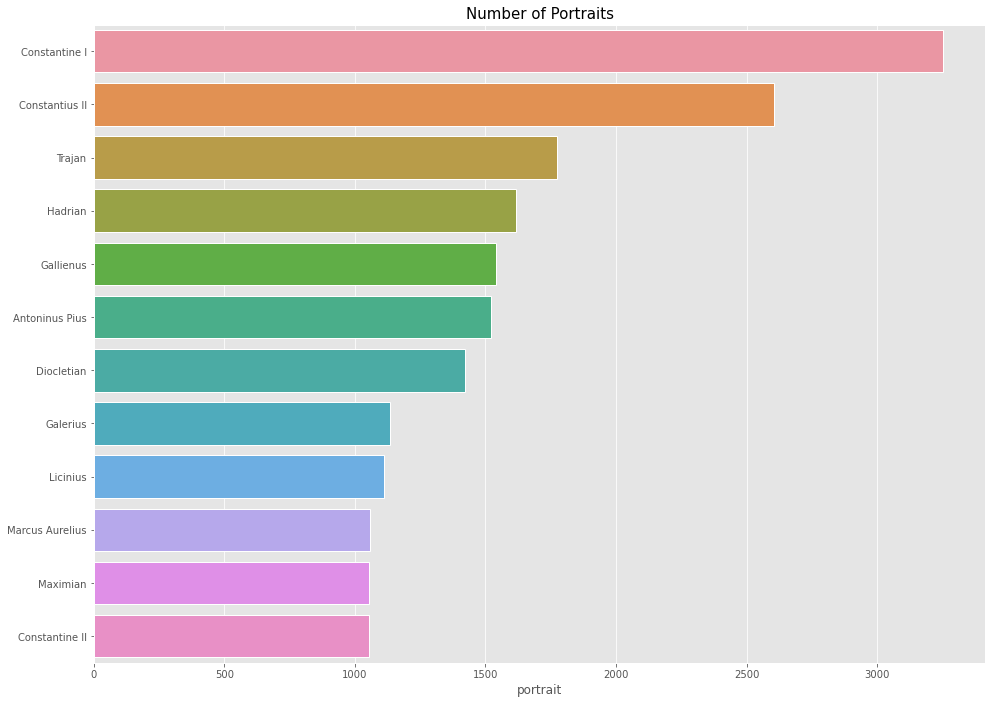

In [12]:
fig,ax = plt.subplots(figsize=(14,10))
sns.set(font_scale=1.15)
sns.barplot(y = df_target['portrait'].value_counts().index, 
            x = df_target['portrait'].value_counts(),
            ax = ax);
ax.set_title('Number of Portraits',fontsize=15)
plt.tight_layout()

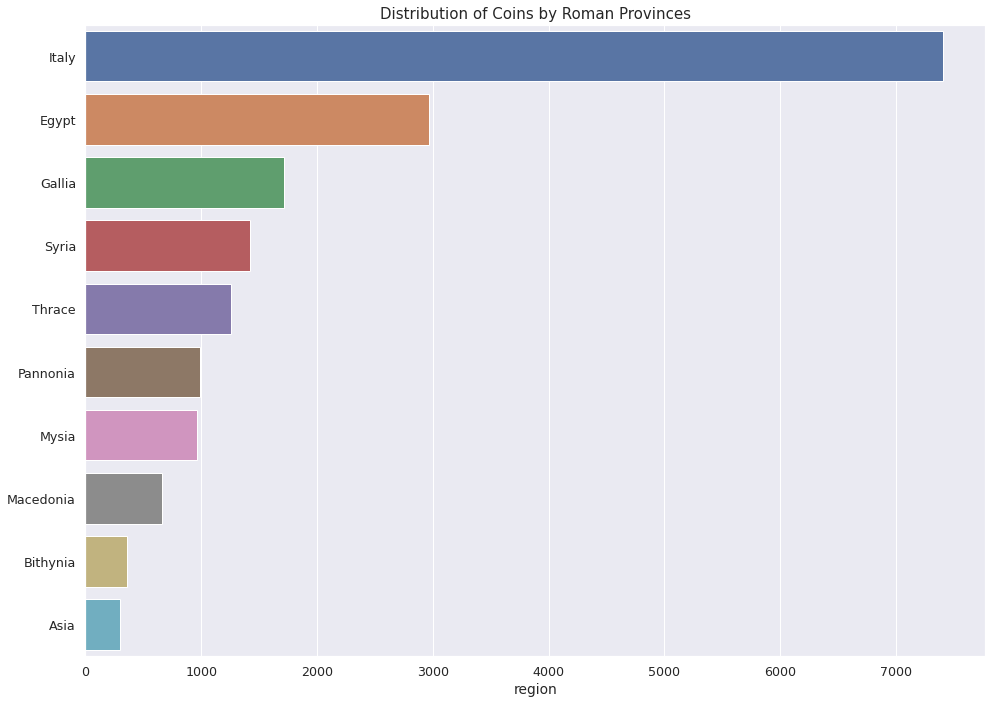

In [13]:
df_temp = df_target[df_target.groupby('region')['region'].transform('size')>250]

fig,ax = plt.subplots(figsize=(14,10))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['region'].value_counts().index,
            x = df_temp['region'].value_counts(),
            ax = ax);
ax.set_title('Distribution of Coins by Roman Provinces',fontsize=15)
plt.tight_layout()

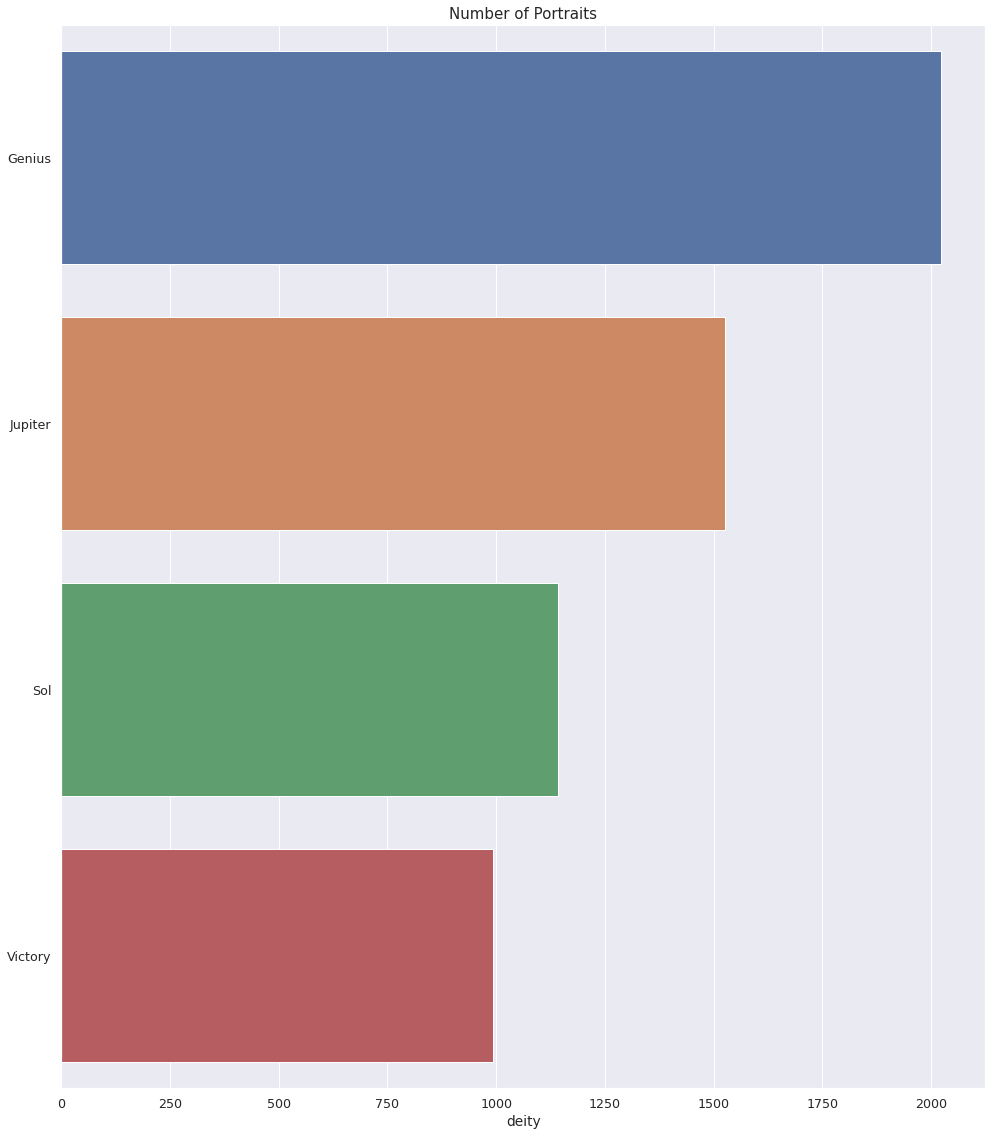

In [14]:
df_temp = df_target[df_target.groupby('deity')['deity'].transform('size')>500]

fig,ax = plt.subplots(figsize=(14,16))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['deity'].value_counts().index,
            x = df_temp['deity'].value_counts(),
            ax = ax);
ax.set_title('Number of Portraits',fontsize=15)
plt.tight_layout()

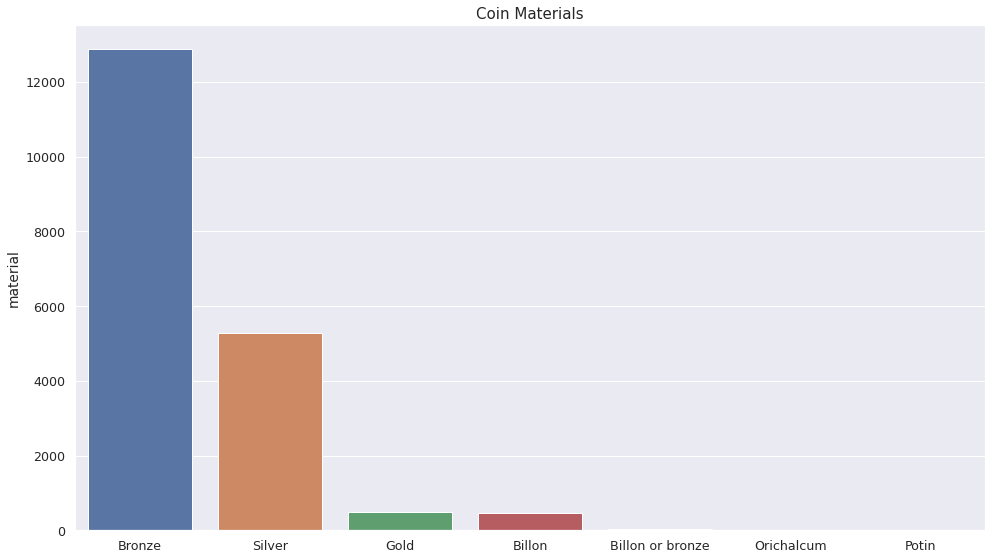

In [15]:
#df_temp = df_target[df_target.groupby('deity')['deity'].transform('size')>250]


fig,ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=1.15)
sns.barplot(x = df_target['material'].value_counts().index,
            y = df_target['material'].value_counts(),
            ax = ax);
ax.set_title('Coin Materials',fontsize=15)
plt.tight_layout()

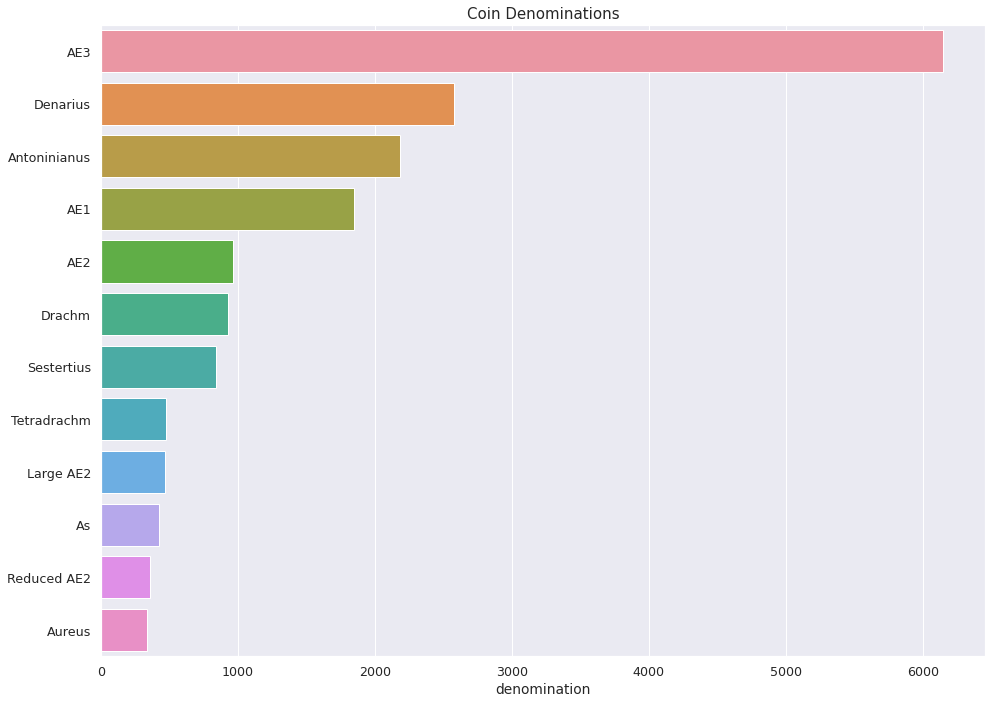

In [16]:
df_temp = df_target[df_target.groupby('denomination')['denomination'].transform('size')>250]

fig,ax = plt.subplots(figsize=(14,10))
sns.set(font_scale=1.15)
sns.barplot(y = df_temp['denomination'].value_counts().index,
            x = df_temp['denomination'].value_counts(),
            ax = ax);
ax.set_title('Coin Denominations',fontsize=15)


# _, ylabels = plt.yticks()
# a.set_yticklabels(ylabels, size=15)

# _, xlabels = plt.xticks()
# a.set_xticklabels(xlabels, size=15)

# ax.set_ylabel('Years',fontsize=15)
# ax.set_xlabel('Number of Coins',fontsize=15)

# ax.set_xticklabels([0,1000,2000,3000,4000,5000,6000,7000],fontsize=15)
# ax.set_title('Denominations over Time',fontsize=15)
plt.tight_layout()

In [35]:
df_target.year.min()

98.0

In [36]:
df_target.year.max()

360.0

In [37]:
bins = [50, 100, 150, 200, 250, 300, 350, 400]
bin_labels = ['51-100','101-150','151-200','201-250','251-300','301-350', '351+']
df_target['years_bins'] = pd.cut(df_target['year'],bins = bins, labels=bin_labels,include_lowest=True)

#df_target.insert(-1,'year_bins',years)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
df_temp = df_target[df_target.groupby('denomination')['denomination'].transform('size')>250]
denominations_df = pd.DataFrame(df_temp.groupby('years_bins')['denomination'].value_counts())

In [39]:
denominations_df.columns = ['counts']

In [40]:
denominations_df.reset_index(inplace=True)

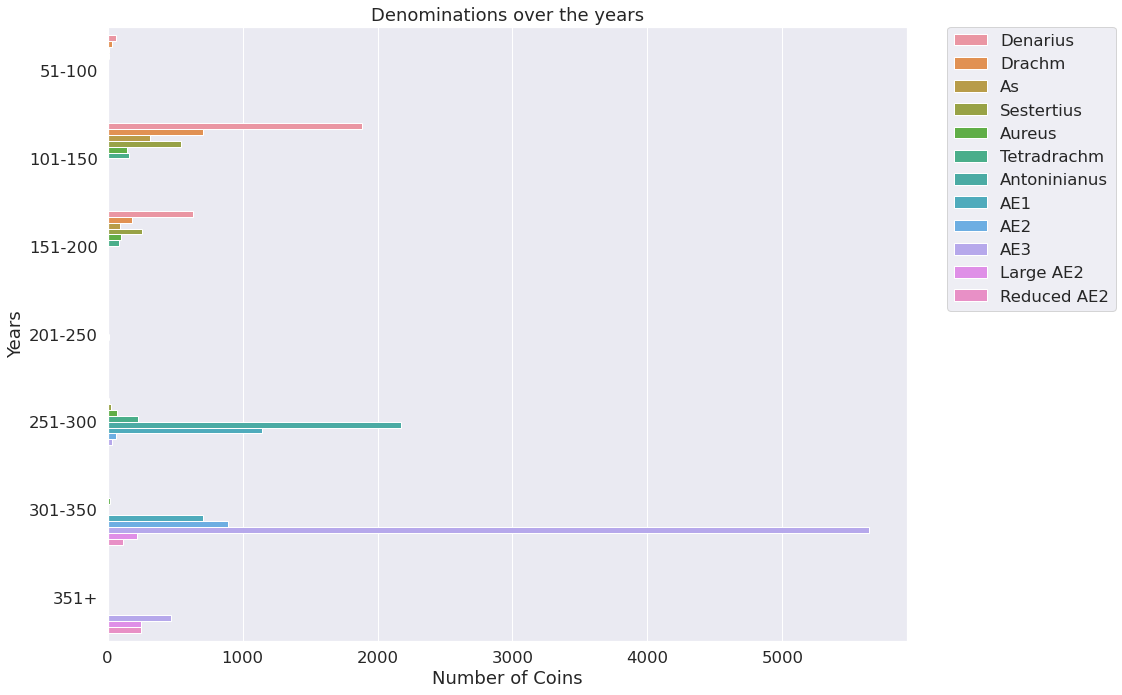

In [42]:
fig,ax = plt.subplots(figsize=(16,10))
sns.set(font_scale = 1.5)
a = sns.barplot(y=denominations_df['years_bins'],
            x=denominations_df['counts'],
            hue=denominations_df['denomination'],
            ax=ax);
ax.set_title('Denominations over the years')
ax.set_ylabel('Years',fontsize=18)
ax.set_xlabel('Number of Coins',fontsize=18)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.tight_layout()